In [141]:
#Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine

#Connect to SQL server using sqlalchemy
def fetch_banking_data():
    """Fetch banking data using SQLAlchemy engine (pandas preferred method)."""
    connection_string = (
        "mssql+pyodbc://DESKTOP-QJ2NGUJ\\SQLEXPRESS/banking_case?"
        "trusted_connection=yes&driver=SQL+Server"
    )
    
    try:
        engine = create_engine(connection_string)
        query = "SELECT * FROM Banking" 
        df = pd.read_sql(query, engine) #DataFrame now holds the results of the sql
        return df
        
    except Exception as e:
        print(f"Error occurred: {e}")
        return None
    
    
df = fetch_banking_data()
if df is not None:
    print(df)

     Client_ID              Name  Age  Location_ID Joined_Bank  \
0     IND81288     Raymond Mills   24        34324  2019-05-06   
1     IND65833     Julia Spencer   23        42205  2001-12-10   
2     IND47499    Stephen Murray   27         7314  2010-01-25   
3     IND72498    Virginia Garza   40        34594  2019-03-28   
4     IND60181   Melissa Sanders   46        41269  2012-07-20   
...        ...               ...  ...          ...         ...   
2995  IND66827         Earl Hall   82         8760  2014-10-09   
2996  IND40556  Billy Williamson   44        32837  2009-02-05   
2997  IND72414      Victor Black   70        36088  2009-12-29   
2998  IND46652       Andrew Ford   56        24871  2006-02-13   
2999  IND40216        Amy Nguyen   79        38518  2005-12-08   

          Banking_Contact Nationality                     Occupation  \
0          Anthony Torres    American           Safety Technician IV   
1        Jonathan Hawkins     African            Software Consu

In [247]:
df.head() #display 5 rows

,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId,Income_Band,Age_Group,Deposit_to_Income,Loan_to_Deposit,Risk_Score
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1,2,1,1,1,Low,"(20, 35]",19.709930,0.522431,1029.707860
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,1,3,2,1,2,Med,"(20, 35]",2.213274,1.980747,438.393703
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1,3,3,2,3,Med,"(20, 35]",6.081149,1.018690,619.480639
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,0,4,4,1,4,High,"(35, 55]",2.937594,0.115627,33.966453
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,0,3,1,2,5,Med,"(35, 55]",3.731744,2.149117,801.995614


In [135]:
df.shape #display numerical information

(3000, 25)

In [137]:
df.info() #display columns, nonnull, and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location_ID               3000 non-null   int64  
 4   Joined_Bank               3000 non-null   object 
 5   Banking_Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee_Structure             3000 non-null   object 
 9   Loyalty_Classification    3000 non-null   object 
 10  Estimated_Income          3000 non-null   float64
 11  Superannuation_Savings    3000 non-null   float64
 12  Amount_of_Credit_Cards    3000 non-null   int64  
 13  Credit_Card_Balance       3000 non-null   float64
 14  Bank_Loa

In [9]:
#Generative descriptive statistics for dataframe
df.describe()

,Age,Location_ID,Estimated_Income,Superannuation_Savings,Amount_of_Credit_Cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034184,25531.599685,1.463667,3176.206944,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529998,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808180,16259.950768,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924033,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480469,1482.030029,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.597656,12513.774902,1.000000,1236.630005,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542236,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.476562,22357.355469,1.000000,2560.804932,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190430,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.300781,35464.741211,2.000000,4522.632690,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.391602,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.250000,75963.898438,3.000000,13991.990234,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.867188,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [64]:
df['Estimated_Income'].min()

15919.48046875

In [145]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']
#create bins and labels to filter out the Estimated_Income
df['Income_Band'] = pd.cut(df['Estimated_Income'], bins=bins, labels=labels, right = False)

<Axes: xlabel='Income Band'>

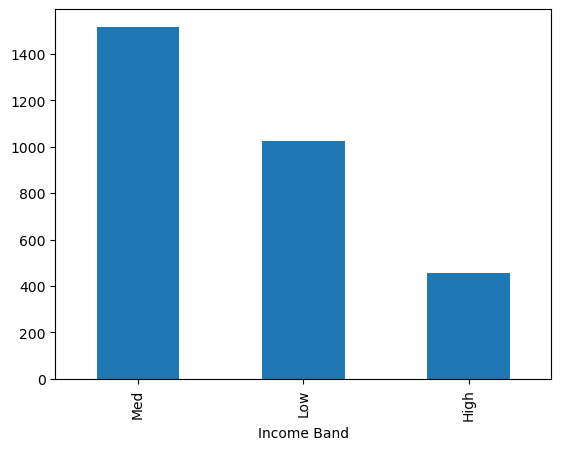

In [147]:
df['Income_Band'].value_counts().plot(kind = 'bar', xlabel = 'Income Band')

In [149]:
#Examine the distribution of unique categories in catregorical columns
categorical_cols = df[['BRId', 'GenderId', 'IAId','Amount_of_Credit_Cards', 'Nationality', 'Occupation', 'Fee_Structure', 'Loyalty_Classification', 'Properties_Owned', 'Risk_Weighting', 'Income_Band']]

for col in categorical_cols:
    print(f"Value Coutns for '{col}':")
    display(df[col].value_counts())

Value Coutns for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Coutns for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Coutns for 'IAId':


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Coutns for 'Amount_of_Credit_Cards':


Amount_of_Credit_Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Coutns for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Coutns for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Coutns for 'Fee_Structure':


Fee_Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Coutns for 'Loyalty_Classification':


Loyalty_Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Coutns for 'Properties_Owned':


Properties_Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Coutns for 'Risk_Weighting':


Risk_Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Coutns for 'Income_Band':


Income_Band
Med     1517
Low     1027
High     456
Name: count, dtype: int64

## Univariate Analysis

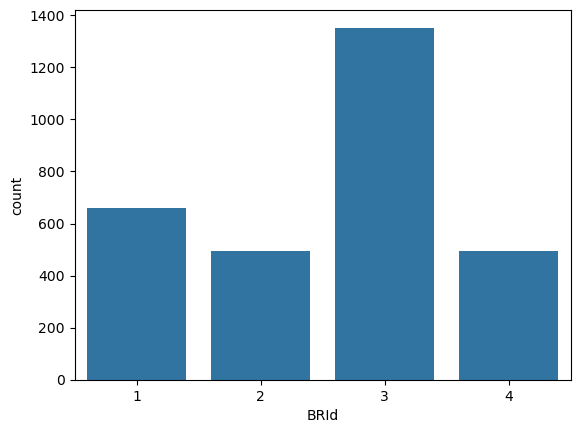

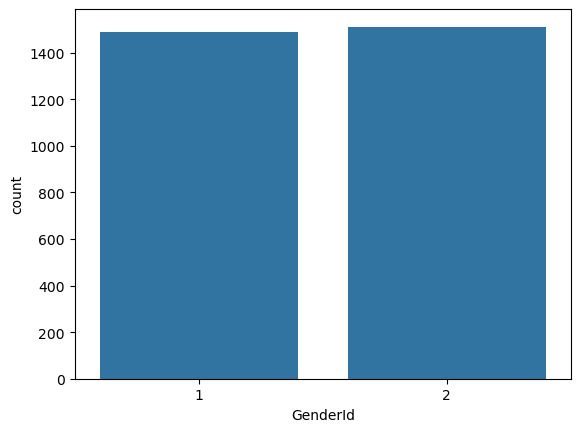

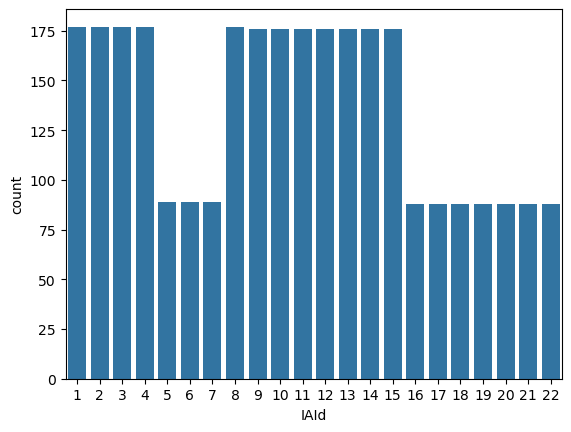

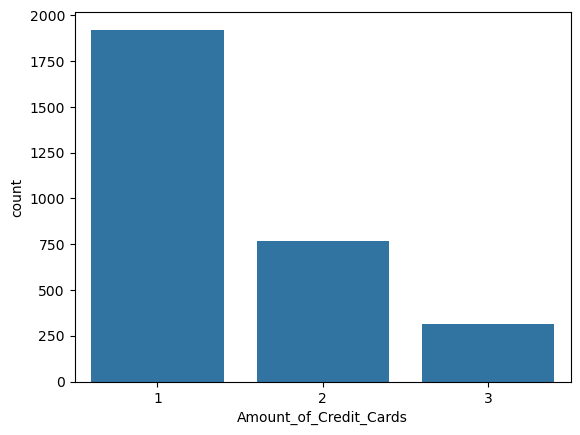

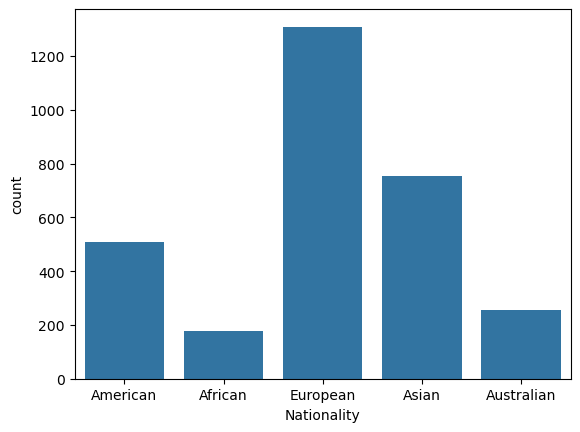

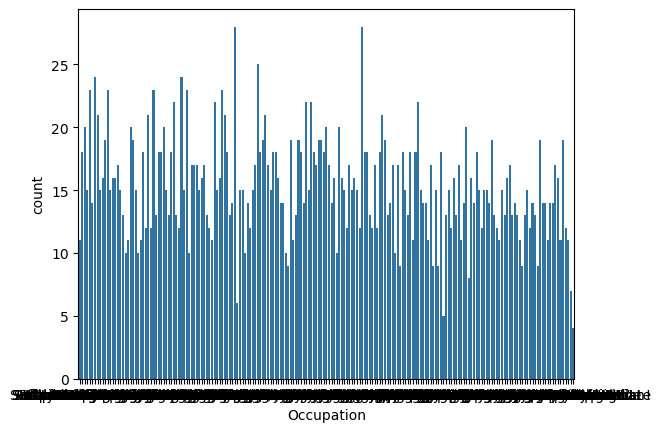

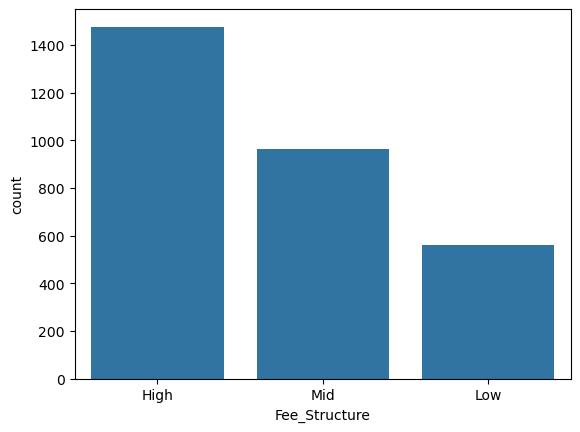

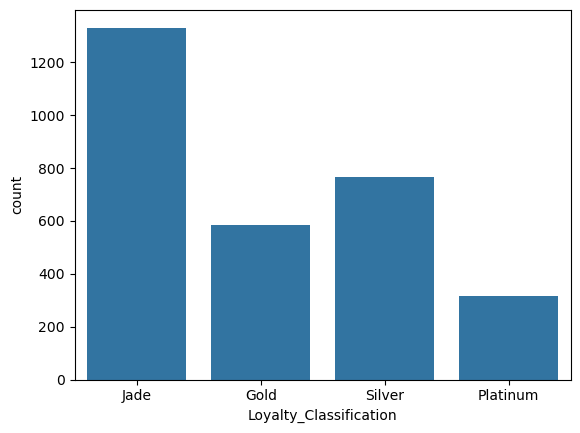

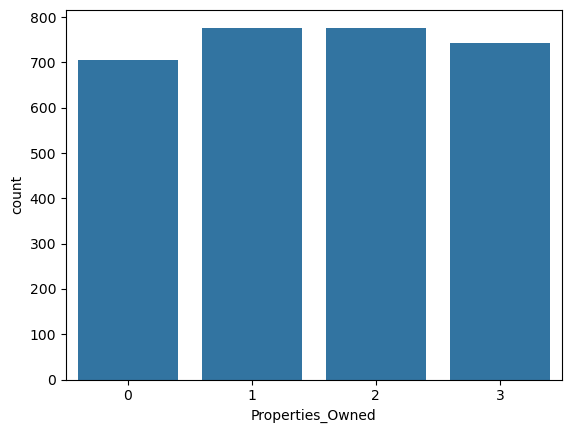

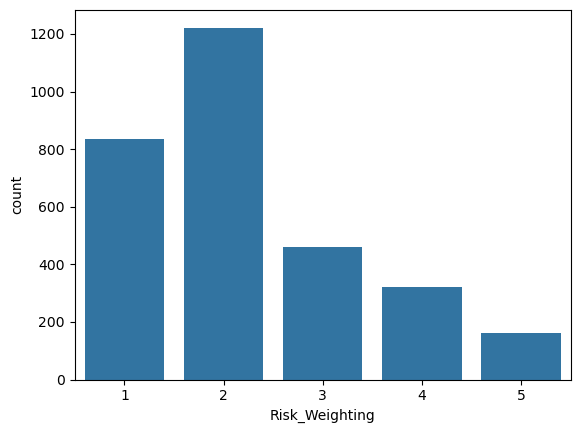

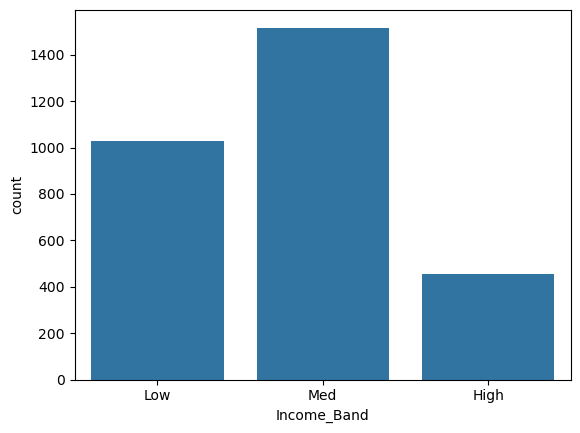

In [84]:
categorical_cols = df[['BRId', 'GenderId', 'IAId','Amount_of_Credit_Cards', 'Nationality', 'Occupation', 'Fee_Structure', 'Loyalty_Classification', 'Properties_Owned', 'Risk_Weighting', 'Income_Band']]

for i, predictor in enumerate(df[['BRId', 'GenderId', 'IAId','Amount_of_Credit_Cards', 'Nationality', 'Occupation', 'Fee_Structure', 'Loyalty_Classification', 'Properties_Owned', 'Risk_Weighting', 'Income_Band']]):
                              plt.figure(i)
                              sns.countplot(data=df, x = predictor)

## Bivariate Analysis

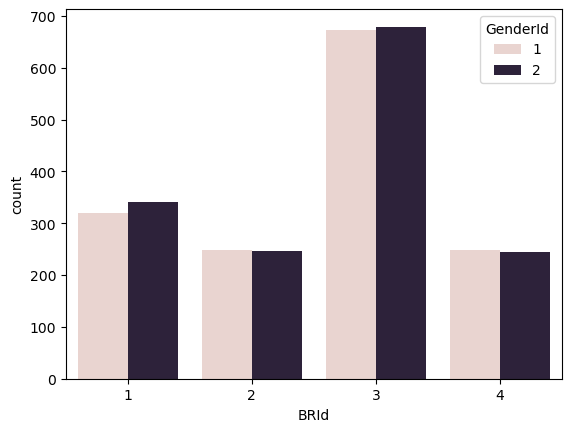

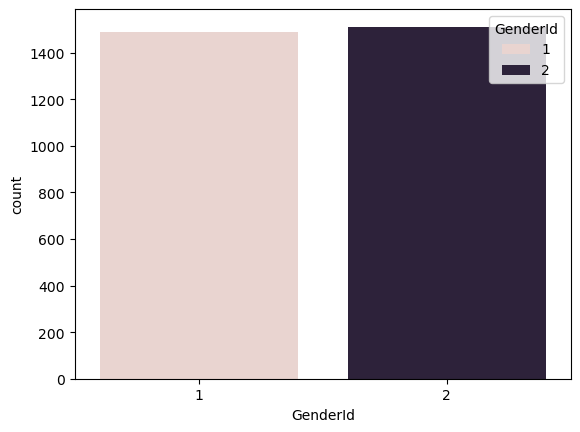

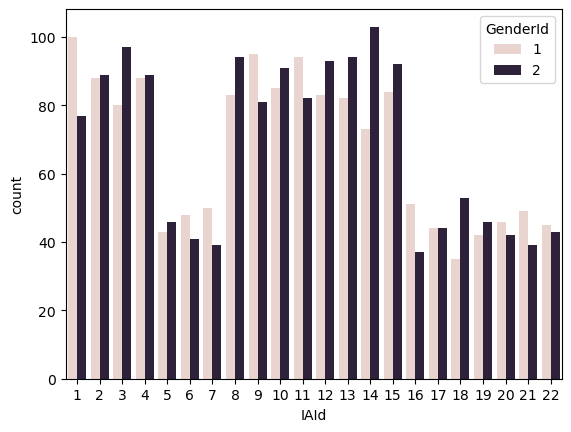

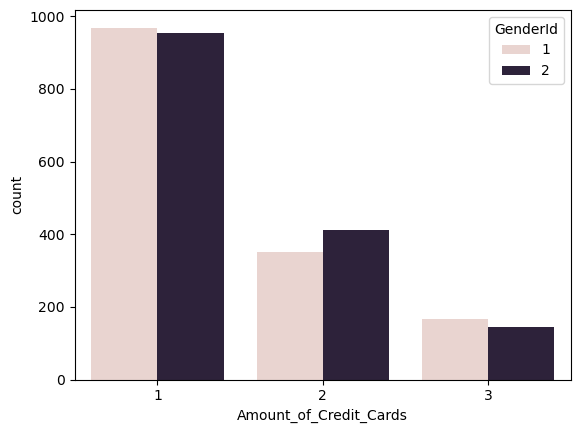

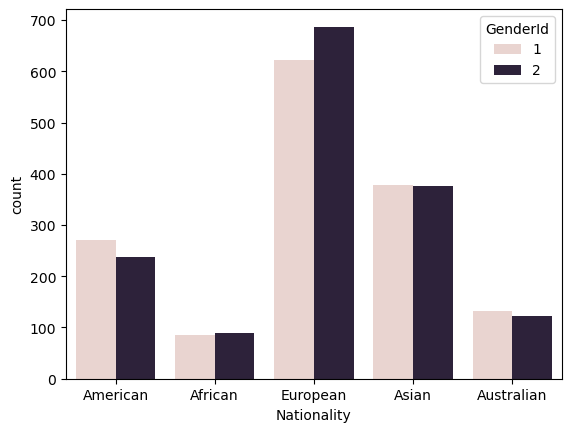

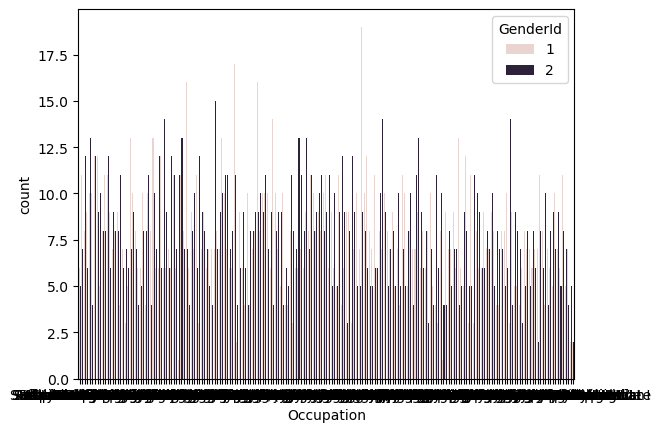

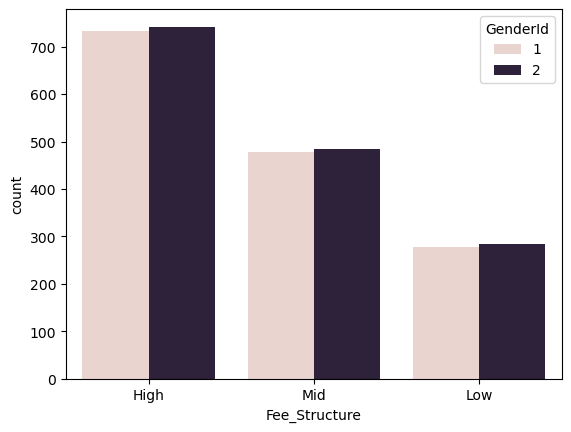

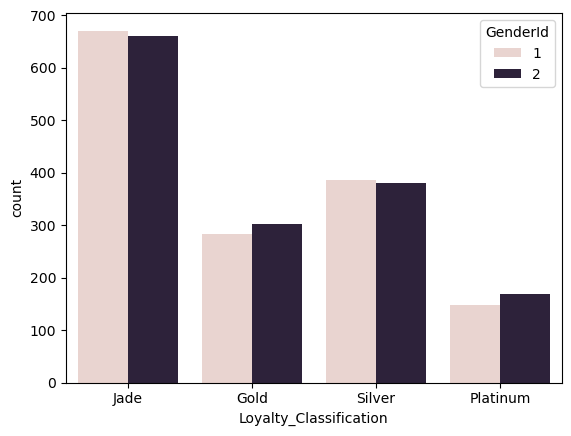

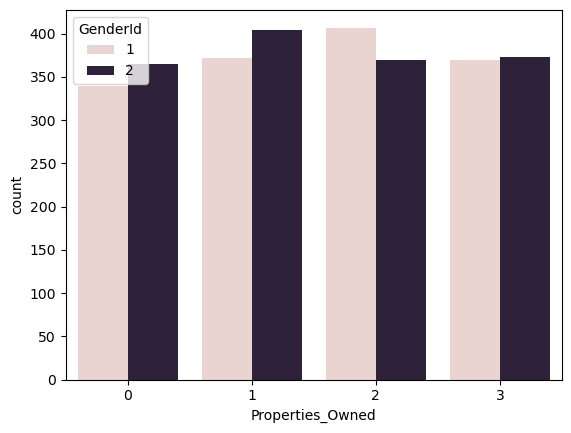

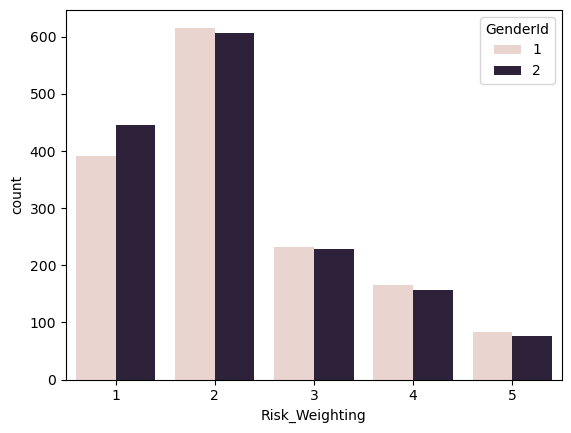

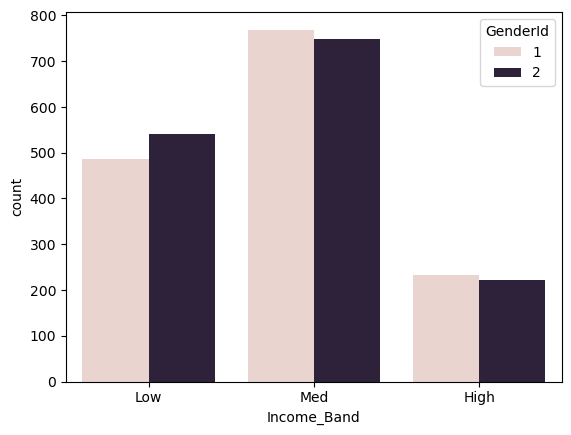

In [151]:
#Examine the distribution of unique categories in catregorical columns
categorical_cols = df[['BRId', 'GenderId', 'IAId','Amount_of_Credit_Cards', 'Nationality', 'Occupation', 'Fee_Structure', 'Loyalty_Classification', 'Properties_Owned', 'Risk_Weighting', 'Income_Band']]

for i, predictor in enumerate(df[['BRId', 'GenderId', 'IAId','Amount_of_Credit_Cards', 'Nationality', 'Occupation', 'Fee_Structure', 'Loyalty_Classification', 'Properties_Owned', 'Risk_Weighting', 'Income_Band']]):
                              plt.figure(i)
                              sns.countplot(data=df, x = predictor, hue = 'GenderId')

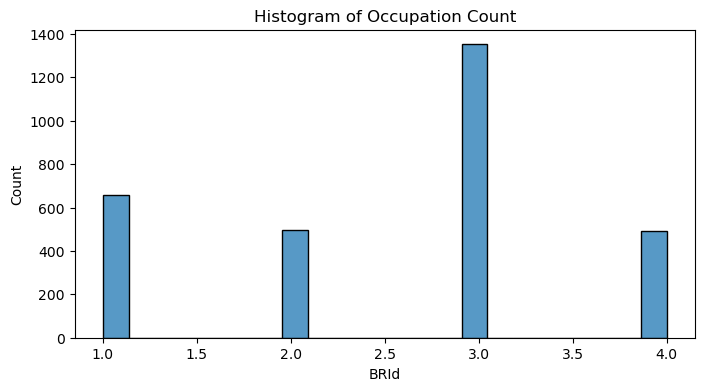

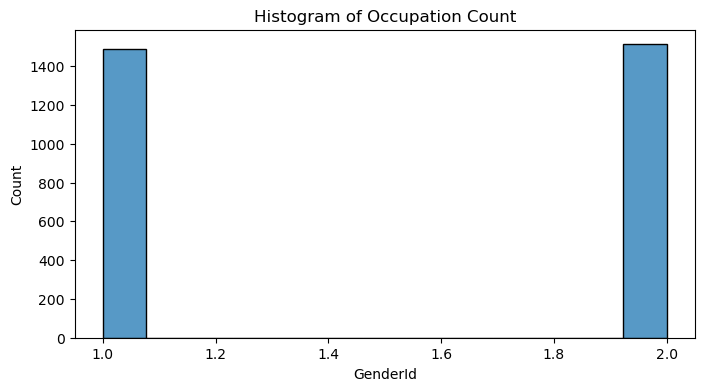

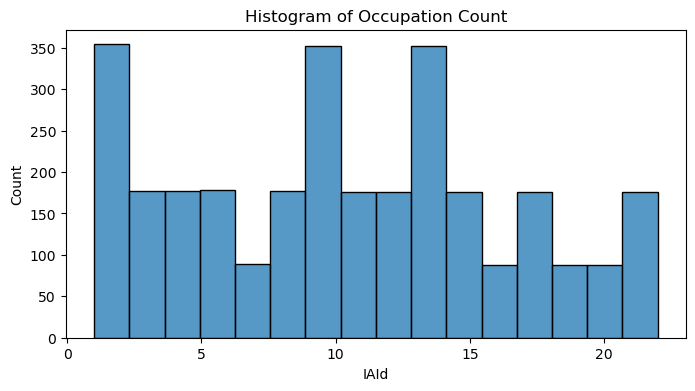

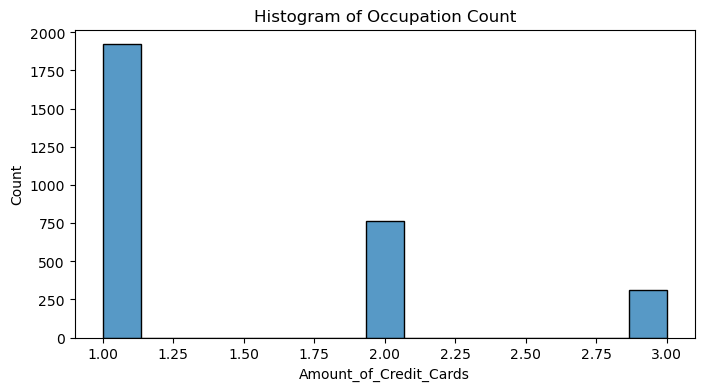

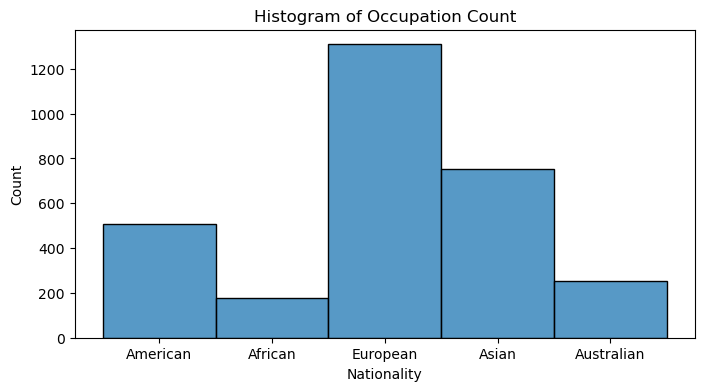

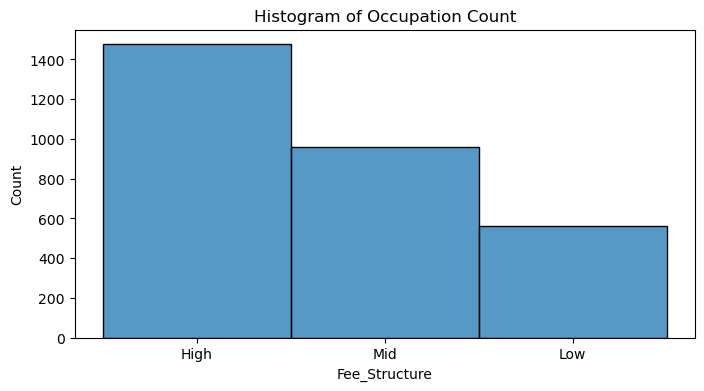

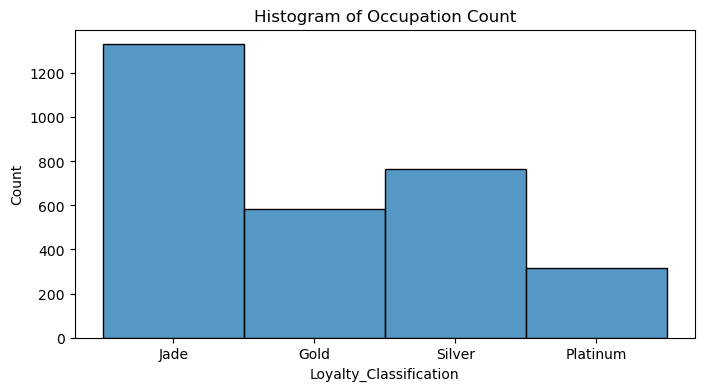

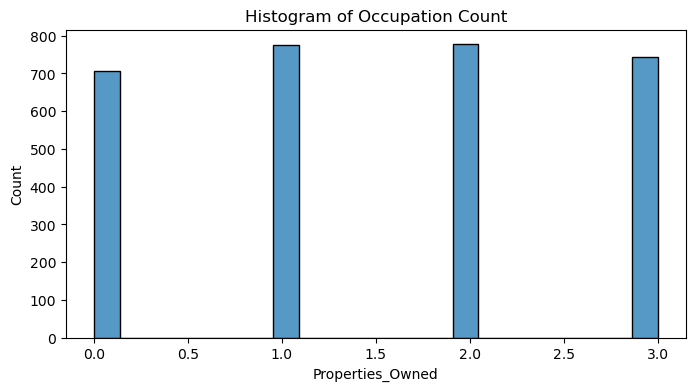

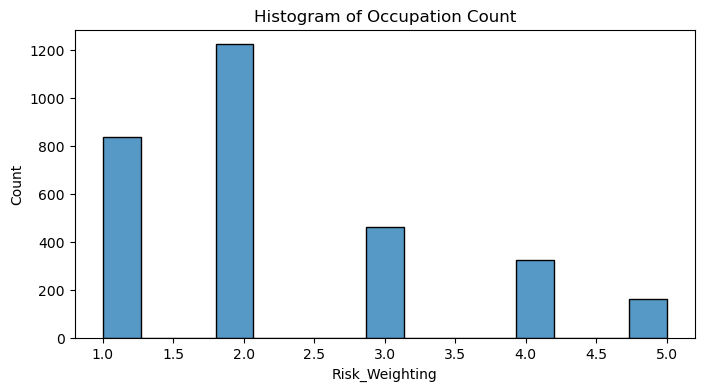

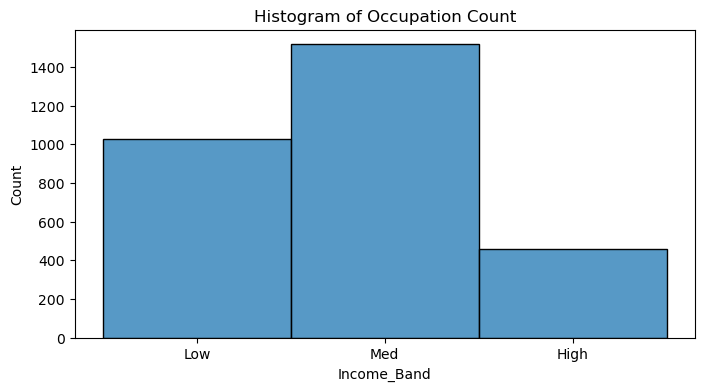

In [153]:
#Histplot of value counts for different occupation
for col in categorical_cols:
    if col == "Occupation":
        continue
    plt.figure(figsize = (8,4))
    sns.histplot(df[col])
    plt.title('Histogram of Occupation Count')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Numerical Analysis

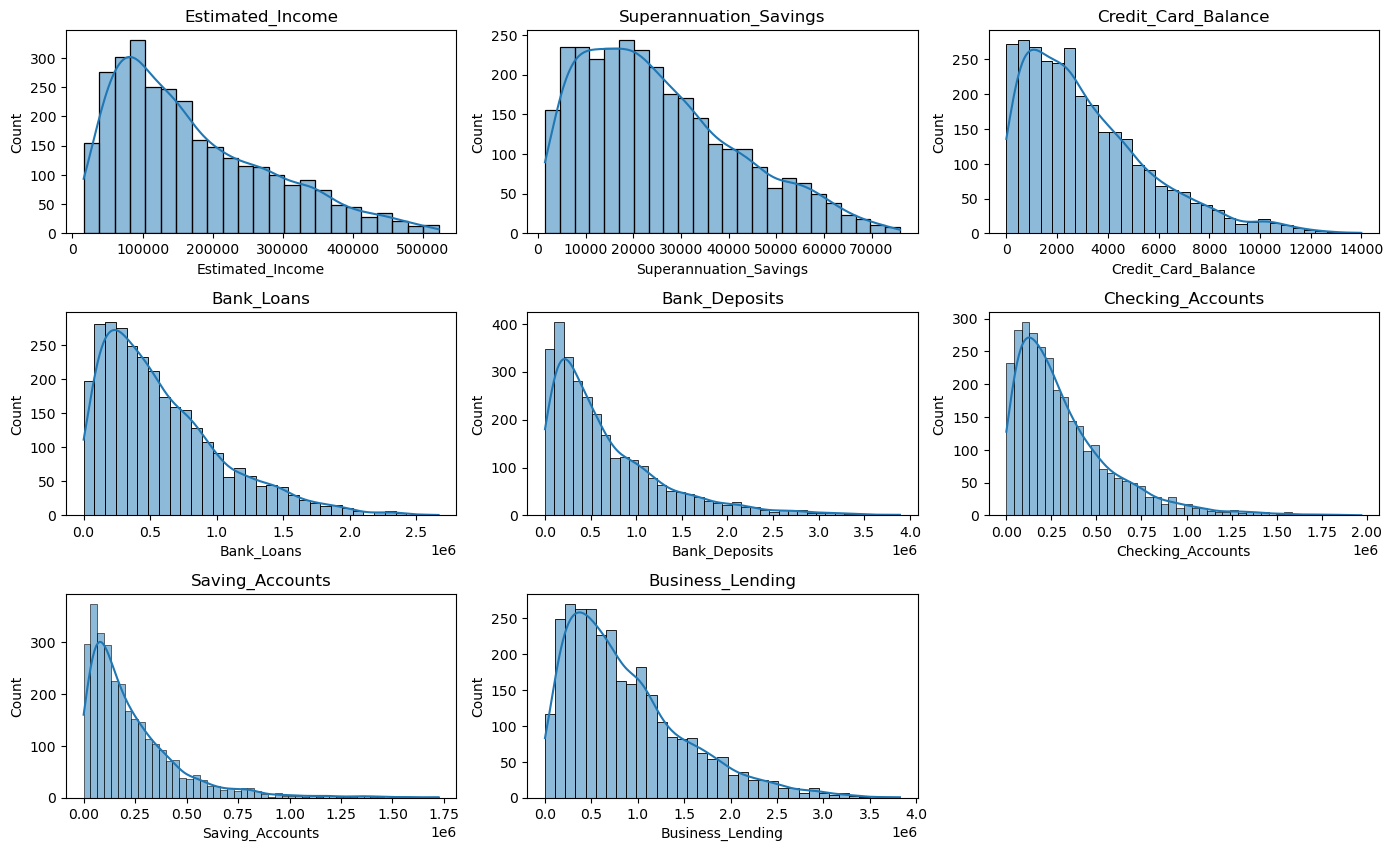

In [117]:
numerical_cols = ['Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Business_Lending']

# Univariate analysis and visualization
plt.figure(figsize =(14,11))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde = True)
    plt.title(col)
plt.tight_layout()  # Fix overlapping
plt.show()

## Heatmaps

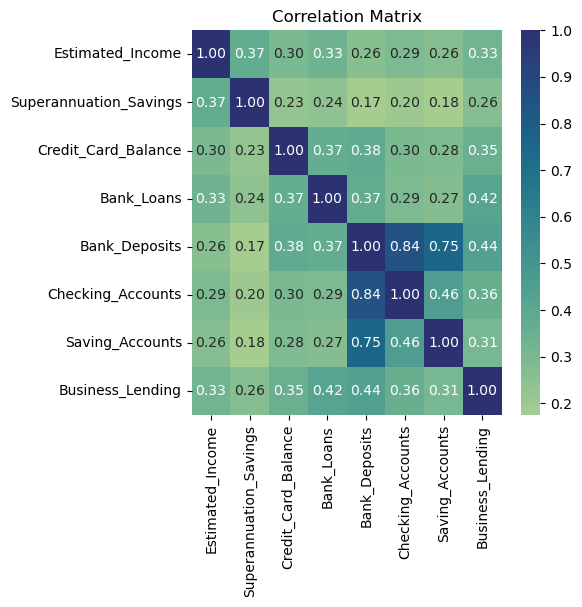

In [253]:
numerical_cols = ['Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Business_Lending']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot = True, cmap = 'crest', fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

## Insights of EDA:

1. Strongest positive correlation occur among "Bank Deposits" with "Checking Accounts", "Saving Accounts" and "Foreign Currency Account" indicating that customers who maintain high balances in one account type often hold funds across other accounts as well

In [255]:
gender_comparison = df.groupby('GenderId').agg({
    'Credit_Card_Balance': 'mean',
    'Bank_Deposits': 'mean',
    'Saving_Accounts': 'mean',
    'Business_Lending': 'mean',
    'Amount_of_Credit_Cards': 'mean',
})
gender_comparison


#find insights on gender differences in different categories. Fairly even distribution.


,Credit_Card_Balance,Bank_Deposits,Saving_Accounts,Business_Lending,Amount_of_Credit_Cards
GenderId,,,,,
1,3179.473515,669357.173218,237258.315423,865573.957942,1.461022
2,3172.992224,673728.246123,228627.438628,867926.837087,1.466270


In [191]:
pd.crosstab(df['GenderId'], df['Loyalty_Classification'])

#Jade Clients has the most clients (1331)

Loyalty_Classification,Gold,Jade,Platinum,Silver
GenderId,,,,
1,283,671,148,386
2,302,660,169,381


In [195]:
df.head(20)

,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId,Income_Band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,6.036179e+05,607332.437500,12249.959961,1.134475e+06,1,2,1,1,1,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,2.295214e+05,344635.156250,61162.308594,2.000526e+06,1,3,2,1,2,Med
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,6.526747e+05,203054.343750,79071.781250,5.481376e+05,1,3,3,2,3,Med
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1.048158e+06,234685.015625,57513.648438,1.148402e+06,0,4,4,1,4,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,4.466442e+05,128351.453125,30012.140625,1.674412e+06,0,3,1,2,5,Med
5,IND78532,Samuel Hudson,23,13204,2019-02-07,Douglas Tucker,American,Help Desk Technician,High,Silver,...,7.456278e+05,238310.375000,15615.179688,1.556031e+06,1,2,1,1,6,Med
6,IND95683,Timothy Alexander,46,42910,2002-06-02,Douglas Tucker,Asian,Account Coordinator,High,Gold,...,6.058850e+04,24639.330078,3045.780029,1.541116e+05,1,1,1,2,7,Low
7,IND40785,Carl Martin,78,6127,2000-11-03,Steve Diaz,European,Automation Specialist II,Mid,Gold,...,5.388973e+04,46813.781250,51979.191406,1.171457e+06,0,2,2,2,8,Low
8,IND13570,Philip Day,67,32656,2015-04-07,Bruce Butler,Asian,Software Test Engineer II,High,Silver,...,3.283346e+05,279528.125000,27125.279297,4.645603e+05,0,1,2,2,9,Low
9,IND53299,Jason Sims,51,28340,1995-11-20,Joe Price,European,Geologist III,Mid,Silver,...,1.115320e+05,115869.390625,48043.519531,9.085839e+05,2,1,3,1,10,Low


In [185]:
jade_stats = df[df['Loyalty_Classification'] == 'Jade'].agg({
    'Bank_Deposits': ['sum', 'count'],
    'Bank_Loans': 'sum'
})

# Compare to overall portfolio
total_deposits = df['Bank_Deposits'].sum()
total_loans = df['Bank_Loans'].sum()

print(f"Jade clients hold {jade_stats['Bank_Deposits']['sum']/total_deposits:.1%} of deposits")
print(f"But only {jade_stats['Bank_Loans']['sum']/total_loans:.1%} of loans")

Jade clients hold 46.0% of deposits
But only 45.4% of loans


In [217]:
loyalty_stats = df.groupby('Loyalty_Classification').agg({
    'Bank_Deposits': ['mean', 'count'],
    'Business_Lending': 'mean',
    'Credit_Card_Balance': 'mean'
})
#comparing loyalty stats to uncover any insights
print(loyalty_stats)

                        Bank_Deposits       Business_Lending  \
                                 mean count             mean   
Loyalty_Classification                                         
Gold                    664384.579268   585    867108.994451   
Jade                    696576.840280  1331    877876.542986   
Platinum                611699.423653   317    827364.234449   
Silver                  658361.292442   767    863484.386316   

                       Credit_Card_Balance  
                                      mean  
Loyalty_Classification                      
Gold                           3281.448957  
Jade                           3213.840445  
Platinum                       2950.472304  
Silver                         3123.926782  


In [221]:
gold_stats = df[df['Loyalty_Classification']=='Gold'].agg({
    'Bank_Deposits': 'mean',
    'Business_Lending': 'mean',
    'Credit_Card_Balance': 'mean'
})
#uncover gold 
jade_stats = df[df['Loyalty_Classification']=='Jade'].agg({
    'Bank_Deposits': 'mean',
    'Business_Lending': 'mean',
    'Credit_Card_Balance': 'mean'
})



Gold clients deliver 99% of Jade's lending value
...with just 44% of the clients


In [223]:
european_deposits = df[df['Nationality']=='European']['Bank_Deposits'].sum()
total_deposits = df['Bank_Deposits'].sum()
print(f"European clients hold ${european_deposits/1e6:,.1f}M ({european_deposits/total_deposits:.0%}) of deposits")


European clients hold $874.0M (43%) of deposits


In [233]:
df['Risk_Score'] = (df['Bank_Loans'] / df['Estimated_Income']) * 100
high_risk = df[(df['Risk_Score'] > 150) & (df['Loyalty_Classification'] == 'Gold')]
print(f"{len(high_risk)} Gold clients have loans >1.5x their income")

461 Gold clients have loans >1.5x their income


In [239]:
df['Risk_Score'] = (df['Bank_Loans'] / df['Estimated_Income']) * 100
high_risk = df[(df['Risk_Score'] > 150) & (df['Loyalty_Classification'] == 'Jade')]
print(f"{len(high_risk)} Jade clients have loans >1.5x their income")

1053 Jade clients have loans >1.5x their income


In [241]:
df['Risk_Score'] = (df['Bank_Loans'] / df['Estimated_Income']) * 100
high_risk = df[(df['Risk_Score'] > 150) & (df['Loyalty_Classification'] == 'Platinum')]
print(f"{len(high_risk)} Platinum clients have loans >1.5x their income")

242 Platinum clients have loans >1.5x their income


In [243]:
platinum = df[df['Loyalty_Classification'] == 'Platinum']
print(platinum[['Bank_Deposits','Properties_Owned']].describe())

       Bank_Deposits  Properties_Owned
count   3.170000e+02        317.000000
mean    6.116994e+05          1.558360
std     6.056921e+05          1.108326
min     0.000000e+00          0.000000
25%     1.604685e+05          1.000000
50%     4.354660e+05          2.000000
75%     8.698595e+05          3.000000
max     3.515972e+06          3.000000


In [245]:
fee_analysis = df.groupby(['Fee_Structure','Loyalty_Classification']).agg({
    'Client_ID': 'count',
    'Bank_Deposits': 'median'
})
print(fee_analysis)

                                      Client_ID  Bank_Deposits
Fee_Structure Loyalty_Classification                          
High          Gold                          304  426367.109375
              Jade                          668  516572.421875
              Platinum                      140  464043.593750
              Silver                        364  470270.281250
Low           Gold                          108  378660.937500
              Jade                          240  520857.453125
              Platinum                       61  475859.812500
              Silver                        153  476989.031250
Mid           Gold                          173  500375.937500
              Jade                          423  447626.906250
              Platinum                      116  401209.062500
              Silver                        250  447091.265625
